In [19]:
%%bash
pip install -U kaleido

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-23
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[rosetta2])

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 244 rows, 236 columns and 590 nonzeros
Model fingerprint: 0x39cfc2b6
Model has 236 quadratic constraints
Variable types: 0 continuous, 236 integer (118 binary)
Coefficient statistics:
  Matrix range     [1e-02, 2e+03]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-02, 5e+05]
  QRHS range       [5e-02, 5e-02]
Presolve removed 7 rows and 1 columns
Presolve time: 0.00s
Presolved: 237 rows, 235 columns, 822 nonzeros
Variable types: 0 continuous, 235 integer (118 binary)
Found heuristic solution: objective 146518.88034

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread c

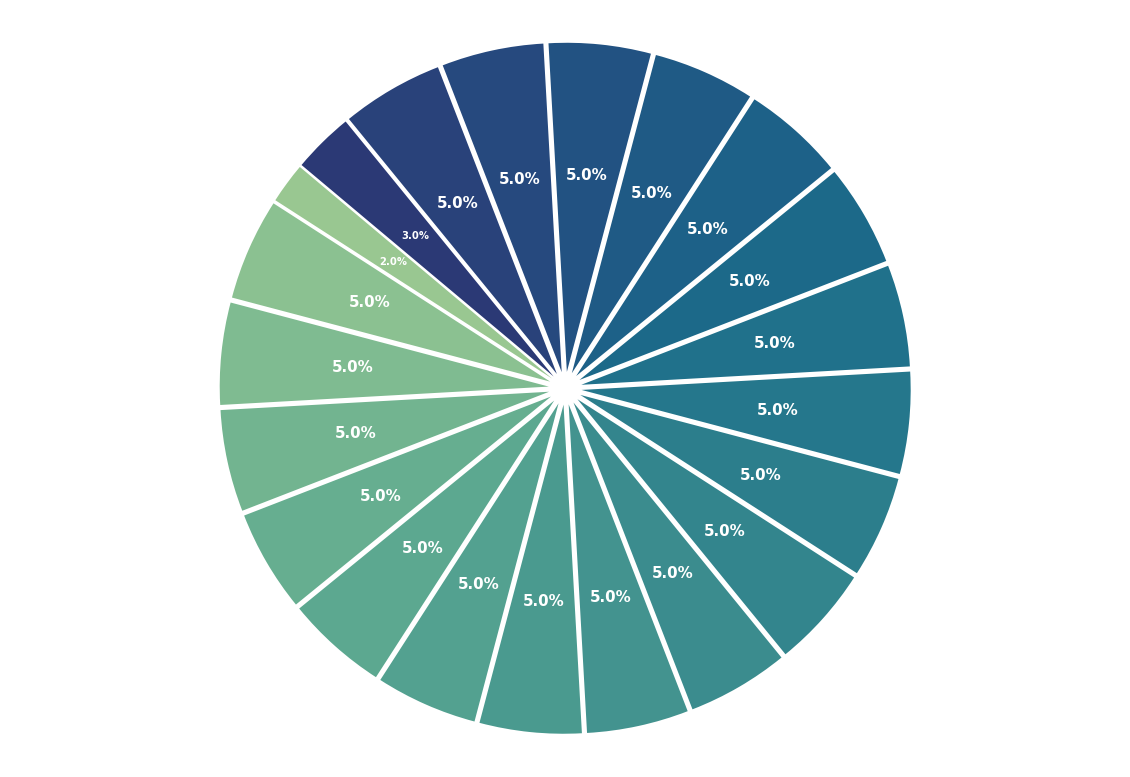

In [2]:
import pandas as pd
from visualization import project_piechart
from visualization import vintage_scatter
from visualization import grade_scatter
from model import model
ourModel = model()
#ourModel.big_optimizer(10000, "medium", 100)
#ourDict = ourModel.returnValueDict()
#ourModel.small_optimizer(10000, "low", 1000, amtTypes=ourDict['amtTypes'], amtVintage=ourDict['amtVintage'], 
                           # amtRegistry=ourDict['amtRegistry'], amtLocations=ourDict['amtLocations'], 
                            #amtMechanisms=ourDict['amtMechanisms'], amtDevs=ourDict['amtDevs'])
ourModel.small_optimizer(10000, "low", 100)
portfolio = ourModel.returnPortfolio()
portfolio
project_piechart(portfolio)

In [3]:
fileName='/Users/meliodas/Downloads/Book6.xlsx'
df = pd.read_excel(fileName)

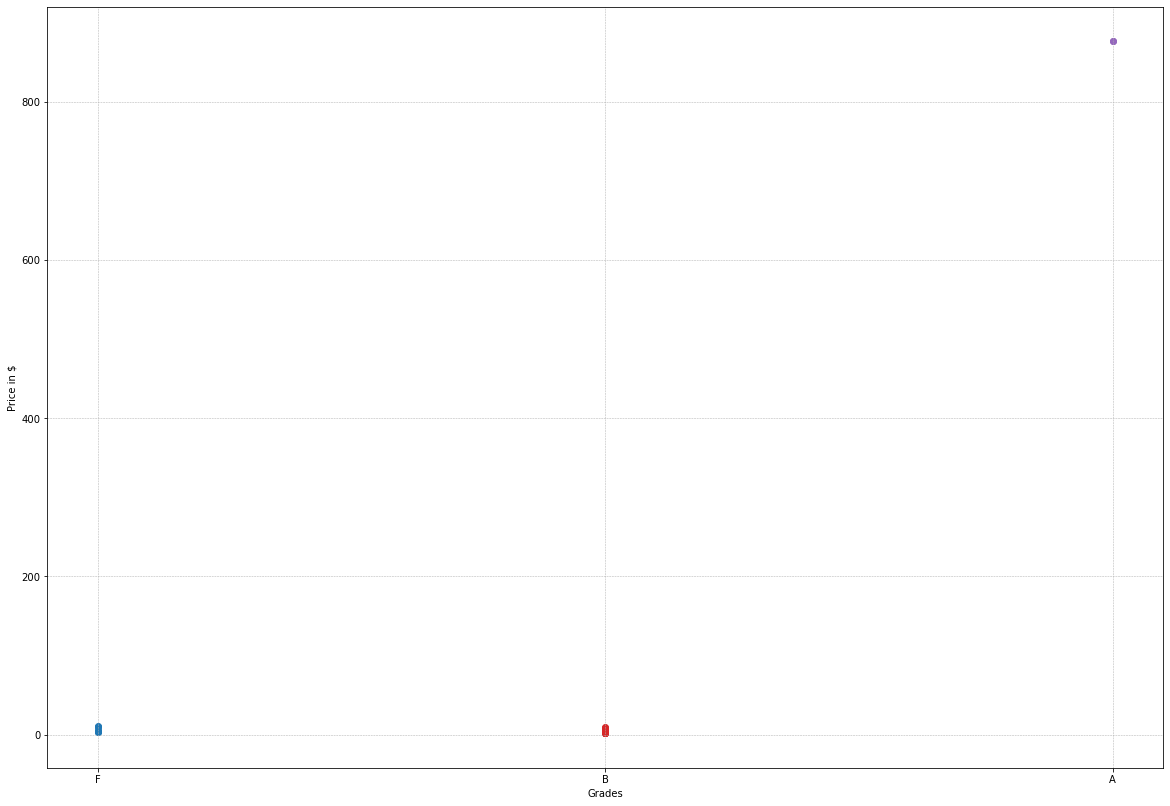

In [4]:
grade_scatter(portfolio, df)

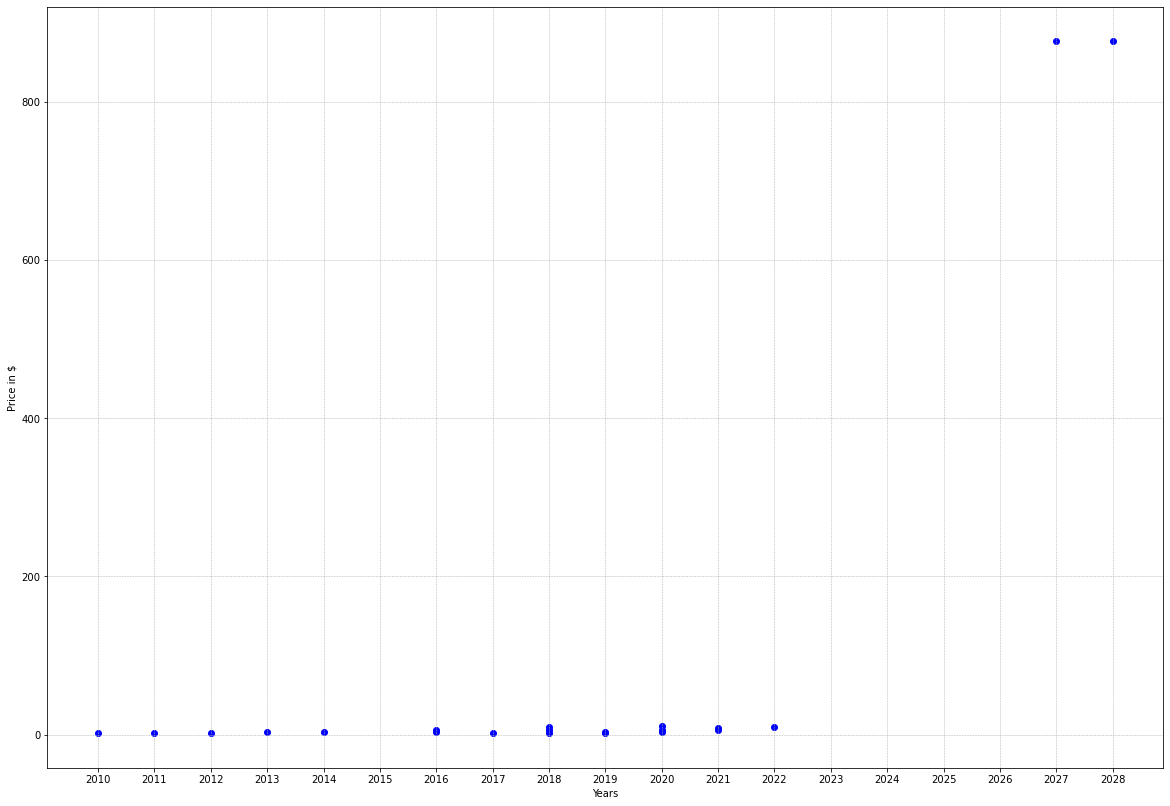

In [ ]:
vintage_scatter(portfolio, df)

In [ ]:
new_col = pd.DataFrame({'Portfolio Amt': portfolio})
df = pd.concat([df, new_col], axis=1)
df.head()

,Project Title,Location,Project Developer,Type,Mechanism,Vintage,Quantity,Dollar,Registry,Standard,Grade,Portfolio Amt
0,Promoting hydroelectric green energy in India,India,EVI Green Markets Pte. Ltd,Hydropower,Avoidance,2019.0,2617.0,2.6300,CDM,CDM,B,50.0
1,Promoting hydroelectric green energy in India,India,EVI Green Markets Pte. Ltd,Hydropower,Avoidance,2018.0,20000.0,2.6300,CDM,CDM,B,50.0
2,Promoting hydroelectric green energy in India,India,EVI Green Markets Pte. Ltd,Hydropower,Avoidance,2017.0,20000.0,2.6300,CDM,CDM,B,37.0
3,The Nut Collectors | Guardians of the Forest,Peru,Bosques Amazónicos,REDD+,Avoidance,2020.0,29500.0,11.2564,Verra,VCS,F,1.0
4,The Nut Collectors | Guardians of the Forest,Peru,Bosques Amazónicos,REDD+,Avoidance,2018.0,30000.0,10.0152,Verra,VCS,F,50.0


In [ ]:
df['Location'] = df['Location'].replace('United States', 'USA')
df[df['Location'] == 'USA'].head()

,Project Title,Location,Project Developer,Type,Mechanism,Vintage,Quantity,Dollar,Registry,Standard,Grade,Portfolio Amt
14,Bio-oil produced from biomass,USA,Charm Industrial,O&G,Removal,2028.0,50000.0,876.0625,Isometric Registry,Isometric Standard,A,1.0
15,Bio-oil produced from biomass,USA,Charm Industrial,O&G,Removal,2027.0,20000.0,876.0625,Isometric Registry,Isometric Standard,A,1.0
16,Bio-oil produced from biomass,USA,Charm Industrial,O&G,Removal,2023.0,1.0,1501.8306,Isometric Registry,Isometric Standard,A,1.0
17,Bio-oil produced from biomass,USA,Charm Industrial,O&G,Removal,2021.0,20.0,1501.8306,Isometric Registry,Isometric Standard,A,1.0


In [ ]:
df.dropna()
df.shape

(1048575, 12)

In [ ]:
#import plotly.express as px
#fig = px.choropleth(df,
                    #locations='Location',  # Column with country names
                    #locationmode='country names',  # Set to 'country names' for choropleth map
                    #color='Portfolio Amt',
                    #hover_name='Location',  # Hover text
                    #color_continuous_scale='Viridis',  # Color scale
                    #range_color=(0,20), # Range of color scale
                    #projection='natural earth'  # Projection type
#)
#fig.show()